In [4]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [5]:
OUTPUT_DIR = '../output'
OUTPUT_CSV_DIR = f'{OUTPUT_DIR}/csv'
OUTPUT_GRAPHS_DIR = f'{OUTPUT_DIR}/graphs'

raw_data_csv = f'latest-output'
cleaned_data_csv = f'cleaned-{raw_data_csv}-2'
outliers_data_csv = f'outliers-{raw_data_csv}-2'

raw_data_csv_filepath = f'{OUTPUT_CSV_DIR}/{raw_data_csv}.csv'
cleaned_data_csv_filepath = f'{OUTPUT_CSV_DIR}/{cleaned_data_csv}.csv'
outliers_data_csv_filepath = f'{OUTPUT_CSV_DIR}/{outliers_data_csv}.csv'


In [6]:
#
# clean the data
#

def _clean_outliers(group, multiplier=3):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = group['Ping Time'].quantile(0.25)
    Q3 = group['Ping Time'].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - (multiplier * IQR)
    upper_bound = Q3 + (multiplier * IQR)

    # Identify the rows with 'Ping Time' values outside the bounds
    outliers = group[(group['Ping Time'] < lower_bound) | (group['Ping Time'] > upper_bound)]

    # Remove the rows with outliers
    cleaned_group = group[(group['Ping Time'] >= lower_bound) & (group['Ping Time'] <= upper_bound)]

    return cleaned_group, outliers

def clean_data(input_filename, cleaned_filename, outliers_filename, multiplier):
    df = pd.read_csv(input_filename)
    df['Ping Time'] = pd.to_numeric(df['Ping Time'], errors='coerce')
    groups = df.groupby('From')

    # Create empty DataFrames to store the cleaned data and outliers
    cleaned_data = pd.DataFrame()
    outliers_data = pd.DataFrame()

    # Iterate over each group, clean the data, and append to the respective DataFrames
    for name, group in groups:
        cleaned_group, outliers = _clean_outliers(group, multiplier)
        cleaned_data = cleaned_data.append(cleaned_group)
        outliers_data = outliers_data.append(outliers)
        print(f"{outliers_data.shape[0]} rows removed in group {name}")

    # Save the cleaned data and outliers to separate CSV files
    cleaned_data.to_csv(cleaned_filename, index=False)
    outliers_data.to_csv(outliers_filename, index=False)
    
def create_histogram_per_group(filename, output):
    data = pd.read_csv(filename)
    
    # Group the data by 'From'
    grouped_data = data.groupby('From')

    # x_min = 0
    # x_max = 450
    # bin_size = 25
    # Plot separate histograms for each group
    output_img_dir = output
    label_color = "black"
    for group_name, group_data in grouped_data:
        # Extract the 'Ping Time' column for the current group
        ping_times = group_data['Ping Time']
        
        print(f"Statistics for {group_name}:")
        print(f"Mean: {np.mean(ping_times)}")
        print(f"Median: {np.median(ping_times)}")
        print(f"Standard Deviation: {np.std(ping_times)}")
        print(f"Variance: {np.var(ping_times)}")
        print(f"Mode: {st.mode(ping_times)}")
        print("\n")
        
        # Plot the histogram for the current group
        plt.clf()
        plt.hist(ping_times)
        plt.xlabel('Ping Time', color=label_color)
        plt.ylabel('Frequency', color=label_color)
        plt.title(f'Distribution of Ping Time ({group_name})', color=label_color)
        plt.tick_params(colors=label_color)
        plt.gca().xaxis.set_tick_params(color=label_color)
        plt.gca().yaxis.set_tick_params(color=label_color)
        
        # Set x-axis ticks to integers only
        if group_name == "ping_BA":
            plt.xticks(range(int(min(ping_times)), int(max(ping_times))+1, ))

        plt.savefig(f"{output_img_dir}/hist-{group_name}.png")

In [7]:
clean_data(raw_data_csv_filepath, cleaned_data_csv_filepath, outliers_data_csv_filepath, multiplier=3)

16 rows removed in group ping_AB
31 rows removed in group ping_AC
37 rows removed in group ping_BC


Statistics for ping_AB:
Mean: 57.451219512195124
Median: 58.0
Standard Deviation: 12.612890978597777
Variance: 159.0850188379932
Mode: ModeResult(mode=array([59.]), count=array([46]))


Statistics for ping_AC:
Mean: 69.13313008130082
Median: 60.0
Standard Deviation: 35.21951429180359
Variance: 1240.4141869505575
Mode: ModeResult(mode=array([39.]), count=array([26]))


Statistics for ping_BC:
Mean: 10.466880566801635
Median: 12.216999999999999
Standard Deviation: 3.392772644984262
Variance: 11.510906220553505
Mode: ModeResult(mode=array([12.52]), count=array([5]))




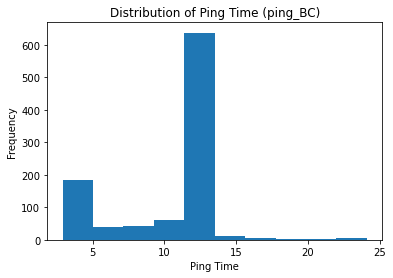

In [8]:
create_histogram_per_group(cleaned_data_csv_filepath, output=OUTPUT_GRAPHS_DIR)

In [ ]:
# make x axis to decimal 
# note that the graphs are not of the same scale
